In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.9MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [11]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [12]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN


**Let's do Q1 now**

MI Wins - 12
DD Wins - 12


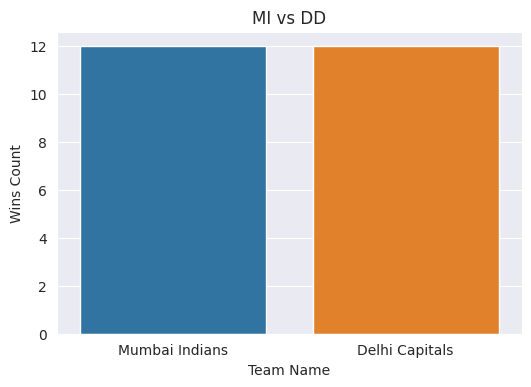

In [15]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs DD')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('DD Wins -',B)

plt.show()


It's a neck to neck fight.

But in season 2019, DC has won the match.

Therefore, DC

**Let's do Q2 now**

**Let's find Rabada's stats v MI**

In [20]:
data_n = data.loc[data.batting_team.isin(['Mumbai Indians'])]
data_n = data_n.loc[data.bowling_team.isin(['Delhi Capitals'])]

In [21]:
data_n.bowler.unique()

array(['K Rabada', 'CH Morris', 'Z Khan', 'A Mishra', 'PJ Cummins',
       'Mohammed Shami', 'CJ Anderson', 'GD McGrath', 'Mohammad Asif',
       'VY Mahesh', 'PJ Sangwan', 'R Bhatia', 'V Sehwag', 'Shoaib Malik',
       'B Geeves', 'MF Maharoof', 'DP Nannes', 'A Nehra', 'AM Salvi',
       'S Ladda', 'AB McDonald', 'PD Collingwood', 'AB Dinda', 'M Morkel',
       'IK Pathan', 'UT Yadav', 'RE van der Merwe', 'AJ Finch',
       'AB Agarkar', 'S Nadeem', 'JR Hopes', 'BMAJ Mendis', 'AD Russell',
       'JP Duminy', 'WD Parnell', 'JD Unadkat', 'LR Shukla', 'S Kaul',
       'Imran Tahir', 'NM Coulter-Nile', 'DJ Muthuswami', 'AD Mathews',
       'Yuvraj Singh', 'P Negi', 'TA Boult', 'DT Christian', 'R Tewatia',
       'GJ Maxwell', 'S Lamichhane', 'HV Patel', 'L Plunkett', 'I Sharma',
       'K Paul', 'AR Patel'], dtype=object)

In [22]:
data_kr = data_n.loc[data.bowler.isin(['K Rabada'])]

In [23]:
data_kr.match_id.nunique()

4

In [24]:
data_kr.player_dismissed.value_counts().sum()

7

It tells us Rabada has took 7 wickets in 4 matches.

Let's mark 2 considering this.

**For Q3, Let's find Hardik's average v DC**

In [30]:
data_hp = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_hp = data_hp.loc[data.batting_team.isin(['Mumbai Indians'])]

In [31]:
data_hp.batsman.unique()

array(['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharma', 'KA Pollard',
       'KH Pandya', 'HH Pandya', 'Harbhajan Singh', 'MJ McClenaghan',
       'MG Johnson', 'LMP Simmons', 'YV Takawale', 'ST Jayasuriya',
       'DJ Thornely', 'RV Uthappa', 'DJ Bravo', 'AM Nayar', 'SM Pollock',
       'SS Tiwary', 'RR Raje', 'SR Tendulkar', 'DR Smith', 'SD Chitnis',
       'PR Shah', 'L Ronchi', 'JP Duminy', 'AM Rahane', 'DS Kulkarni',
       'Mohammad Ashraful', 'AP Tare', 'AT Rayudu', 'C Madan',
       'DJ Jacobs', 'AC Blizzard', 'A Symonds', 'RE Levi', 'KD Karthik',
       'CJ McKay', 'RP Singh', 'PP Ojha', 'MM Patel', 'RJ Peterson',
       'SL Malinga', 'RT Ponting', 'CJ Anderson', 'MEK Hussey',
       'CM Gautam', 'S Gopal', 'M de Lange', 'JJ Bumrah', 'UBT Chand',
       'TG Southee', 'MJ Guptill', 'AS Yadav', 'E Lewis', 'Ishan Kishan',
       'A Dananjaya', 'M Markande', 'BCJ Cutting', 'Q de Kock',
       'Yuvraj Singh', 'R Salam'], dtype=object)

In [32]:
data_hp = data_hp.loc[data.batsman.isin(['HH Pandya'])]

In [34]:
data_hp.batsman_runs.sum()

123

In [35]:
data_hp.match_id.nunique()

9

In [44]:
data_hp.dismissal_kind.value_counts()

caught     6
run out    2
Name: dismissal_kind, dtype: int64

Using this as average is calculated on when player has got out not on Total matches played

In [43]:
np.round(123/8,2)

15.38

Let's mark 11-20 considering our analysis

**Let's do Q4 now**

**Let's find batsman with highest boundaries**

In [37]:
data_n = data.loc[data.bowling_team.isin(['Delhi Capitals','Mumbai Indians'])]
data_n = data_n.loc[data.batting_team.isin(['Mumbai Indians','Delhi Capitals'])]

In [38]:
data_n.noball_runs.sum()

28

In [39]:
data_n.match_id.nunique()

24

Let's mark 1-2 considering this

**Let's do Q5 now**

**Finding runs by both teams**

In [40]:
data_n.total_runs.sum()

7559

In [41]:
np.round(7559/24,2)

314.96

Let's mark 301 - 320 considering our analysis



Thank You for this amazing internship.

It was a great journey.

Learned a lot!

Regards,

Ashaab Rizvi